# Portfolio Assignment week 03

This week's focus is on anomaly detection. As part of the portfolio assignment, you are required to make a contribution using anomaly detection algorithm(s). There are several options for your contribution, so you can choose the one that aligns with your learning style or interests the most

## Anomaly Detection

Anomaly detection in machine learning refers to the process of identifying patterns or instances in a dataset that deviate significantly from the norm or expected behavior. Anomalies, also known as outliers, are data points that are rare, unusual, or don't conform to the typical patterns observed in the majority of the data. Anomaly detection algorithms aim to automatically detect these anomalies. Anomaly detection in machine learning has various applications across domains, including predictive maintenance, and healthcare monitoring. By automatically identifying anomalies, these algorithms help in detecting potential risks. 


## Anomaly Detection Assignment

Study the notebook `Study_Case_Anomoly_Detection` 

Choose at least 1 out of the listed assignments below

- Analyze the end result plot to evaluate the algorithm's performance. Look for anomalies identified by the algorithm and compare them to known anomalies or instances of abnormal behavior in the data. Assess whether the algorithm successfully captures these anomalies and if it shows promising results in detecting abnormal patterns. Based on the plot analysis, provide argumentation for the validity of the anomaly detection algorithm hypothesis (see above). Discuss how the algorithm effectively captures anomalies in the time series data and why it is a suitable approach for the use case. Support your argument with references to relevant literature that discuss the effectiveness of the chosen algorithm or similar algorithms in detecting anomalies in time series data.
- To improve data quality for anomaly detection in time series data, we can focus on removing outliers due to sensor reading errors while preserving anomalies. Additionally, performing resampling or aggregation can help reduce noise and highlight higher-level patterns relevant for anomaly detection. Find common steps to improve data quality for this particular use and implement those. Evaluate the performance of the algorithms compare to the original notebook.
- Try another algorithm that has not been tested in the notebook. Provide argumentation for the validity of the anomaly detection algorithm you choose.
- Try to find the best configuration for one of the tested algorithms
- Try anomaly detection on a different dataset without timeseries data. Intrepret the results

Do not forget to reference sources!

##### From the notebook
Anomaly detection techniques are commonly employed in predictive maintenance strategies to identify abnormal patterns or behaviors in machine data that may indicate impending failures.

By monitoring various sensor readings, operational parameters, or other relevant data from machines, anomaly detection algorithms can learn the normal behavior or expected patterns of the machines during their normal operation. When a deviation from the normal behavior is detected, it may indicate a potential failure or malfunction. The hypothesis is that the sensor readings of a pump will generate not normal values in case of an (upcoming) failure, and these can be determined with anomaly detection. Several algorithms will be used to evaluate the hypothesis

datasource: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


### Loading the dataset

In [2]:
with open("config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)
    df = pd.read_csv(config['sensor'])

In [3]:
sensor = df.copy()

In [4]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
df.shape

(220320, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

Sensor 15 seems completely empty and some columns seem to be missing values.

In [7]:
#check for missing data
missing = df.isnull().sum()
#print(missing.sum())

In [8]:
len(df)

220320

In [9]:
missing.sort_values(ascending=False).head(10)

sensor_15    220320
sensor_50     77017
sensor_51     15383
sensor_00     10208
sensor_07      5451
sensor_08      5107
sensor_06      4798
sensor_09      4595
sensor_01       369
sensor_30       261
dtype: int64

In [10]:
percentage_missing = missing.sort_values(ascending=False) / len(df) * 100
percentage_missing.head()

sensor_15    100.000000
sensor_50     34.956881
sensor_51      6.982117
sensor_00      4.633261
sensor_07      2.474129
dtype: float64

Sensor 15 and 50 have a lot of data missing, so drop these columns.

In [11]:
df['machine_status'].value_counts()

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

In [12]:
# drop the low quality columns
df.drop(['sensor_15', 'sensor_50'],inplace = True,axis=1)

In [13]:
# set timestamp to date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [14]:
# This visualization inspired from JANANI KARIYAWASAM found at 
# https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']

def plot_sensor(sensor):
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering')
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14, label = 'broken')
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

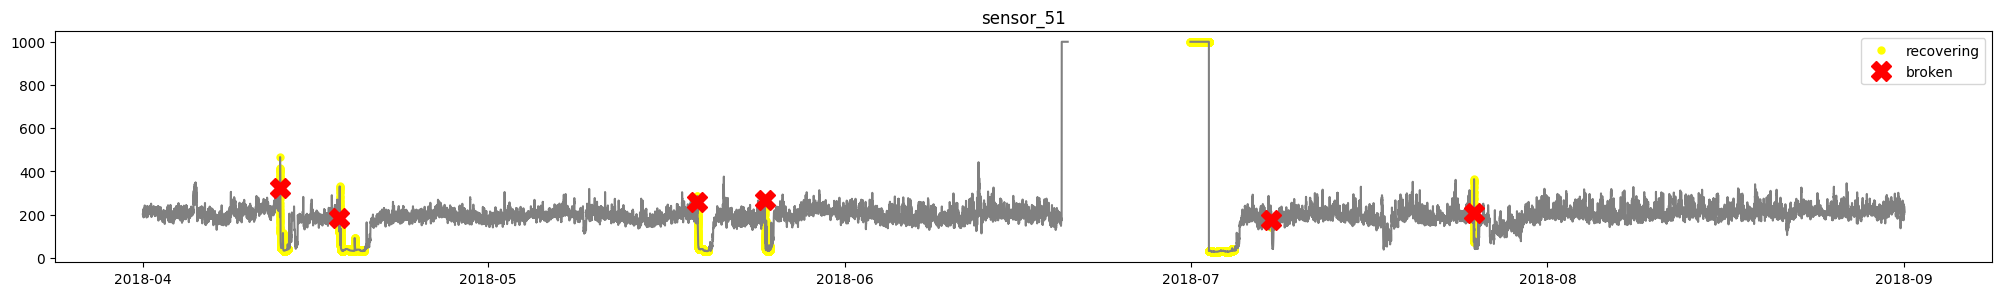

In [15]:
# plot sensor 51
plot_sensor('sensor_51')

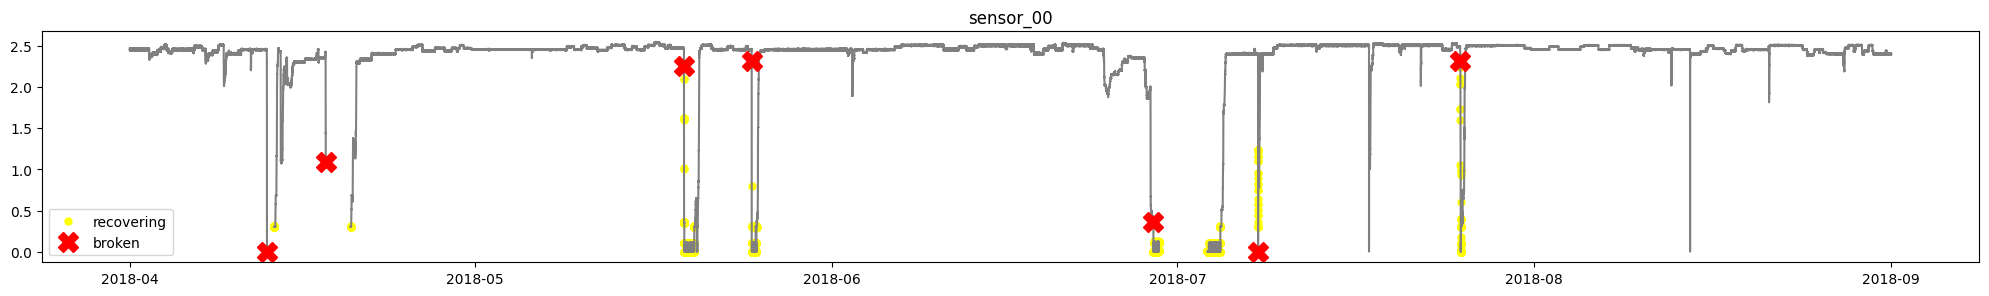

In [16]:
# Sensor 0
plot_sensor('sensor_00')


### Preprocessing for machine learning

In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [21]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#X= scaler.fit_transform(X)

In [22]:
to_impute = df.columns.tolist()

In [23]:
to_impute.remove('machine_status')
to_impute.remove('Unnamed: 0')

In [24]:
to_impute

['sensor_00',
 'sensor_01',
 'sensor_02',
 'sensor_03',
 'sensor_04',
 'sensor_05',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21',
 'sensor_22',
 'sensor_23',
 'sensor_24',
 'sensor_25',
 'sensor_26',
 'sensor_27',
 'sensor_28',
 'sensor_29',
 'sensor_30',
 'sensor_31',
 'sensor_32',
 'sensor_33',
 'sensor_34',
 'sensor_35',
 'sensor_36',
 'sensor_37',
 'sensor_38',
 'sensor_39',
 'sensor_40',
 'sensor_41',
 'sensor_42',
 'sensor_43',
 'sensor_44',
 'sensor_45',
 'sensor_46',
 'sensor_47',
 'sensor_48',
 'sensor_49',
 'sensor_51']

Preprocessing pipeline with a columntransformer that imputes the columns that need it with the mean, passes trough the unnamed column and drops the rest.

In [25]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
                       [("mean_imputer",  imp, to_impute),
                        ("identity", "passthrough", ['Unnamed: 0'])
                       ],
                       remainder = "drop")

In [26]:
#preprocessing pipeline
prep = Pipeline([('column_transformer', ct),('standardscaler', scaler)])

In [27]:
#calculate the outlier fraction
outliers_fraction = 1 - (len(normal_rows)/(len(df))) 


***

## Try to find the best configuration for algorithms

In [28]:
# two algorithms
isolation = IsolationForest()
lof = LocalOutlierFactor()

In [29]:
#Create pipeline for LocalOutlierFactor
pipeline = Pipeline([('prep', prep), ('LOF', lof)])

In [30]:
#Parameters for LocalOutlierFraction
list(pipeline.get_params().keys())[-9:]

['LOF__algorithm',
 'LOF__contamination',
 'LOF__leaf_size',
 'LOF__metric',
 'LOF__metric_params',
 'LOF__n_jobs',
 'LOF__n_neighbors',
 'LOF__novelty',
 'LOF__p']

In [31]:
hyperparams = {'LOF__n_neighbors': np.arange(10, 40, 2),
               'LOF__contamination': np.arange(0, 0.5, 0.01),
               'LOF__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'LOF__novelty': ['True']
               }

# https://stackoverflow.com/questions/58186702/using-gridsearchcv-with-isolationforest-for-finding-outliers
def scorer_f(estimator, X):
      return np.mean(estimator.score_samples(X))

In [32]:
#grid_search = GridSearchCV(scoring=scorer_f, estimator=pipeline, param_grid=hyperparams, cv=5, n_jobs=-1)
#pipe_result = grid_search.fit(df)
#print(pipe_result.best_params_)

interupted cell above, took too long <br>
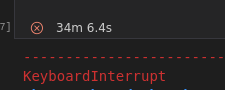

I've tried a bunch of different things. Which all gave a bunch of warnings and errors or massive waiting times for the grid search. Making a scorer itself helped a bit.

***

Here I got mad and wondered if it was a problem with the LOF.
So tested a Gridsearch for Kmeans, because I had seen before that it worked.

In [33]:
from sklearn.cluster import KMeans
kmean = KMeans()
pipeline = Pipeline([('prep', prep), ('kmean', kmean)])

In [34]:
list(pipeline.get_params().keys())[-9:]

['kmean__algorithm',
 'kmean__copy_x',
 'kmean__init',
 'kmean__max_iter',
 'kmean__n_clusters',
 'kmean__n_init',
 'kmean__random_state',
 'kmean__tol',
 'kmean__verbose']

In [39]:
hyperparams = {'kmean__n_clusters': np.arange(2, 15, 1),
               'kmean__init': ['k-means++', 'random'],
               'kmean__algorithm': ['lloyd', 'elkan'],
               'kmean__n_init': ['auto']
               }

In [40]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=hyperparams, cv=5, n_jobs=-1)
result = grid_search.fit(df)

In [41]:
print(result.best_params_)

{'kmean__algorithm': 'lloyd', 'kmean__init': 'k-means++', 'kmean__n_clusters': 13, 'kmean__n_init': 'auto'}


The attempt did not end well, so tried Isolation Forest next. (update: changed some parameters and now it worked.)

***

### Isolation Forest

In [19]:
pipeline = Pipeline([('prep', prep), ('isoforest', isolation)])

In [227]:
list(pipeline.get_params().keys())[-9:]

['isoforest__bootstrap',
 'isoforest__contamination',
 'isoforest__max_features',
 'isoforest__max_samples',
 'isoforest__n_estimators',
 'isoforest__n_jobs',
 'isoforest__random_state',
 'isoforest__verbose',
 'isoforest__warm_start']

In [253]:
hyperparams = {'isoforest__n_estimators': np.arange(10, 200, 10),
               'isoforest__contamination': np.arange(0, 0.5, 0.05),
               
               }
# https://stackoverflow.com/questions/58186702/using-gridsearchcv-with-isolationforest-for-finding-outliers
def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))

In [254]:
grid_search = GridSearchCV(scoring=scorer_f, estimator=pipeline, param_grid=hyperparams, cv=5, n_jobs=-1)

Takes over 1 hour to fit ;-; <br>
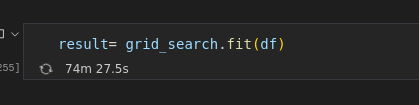

In [ ]:
#result= grid_search.fit(df)

In [ ]:
#print(result.best_params_)

Sp, going with a different set of parameters

In [ ]:
hyperparams = {'isoforest__n_estimators': np.arange(10, 200, 10),
               'isoforest__contamination': ['auto', outliers_fraction],
               
               }

def scorer_f(estimator, X):
      return np.mean(estimator.score_samples(X))

grid_search = GridSearchCV(scoring=scorer_f, estimator=pipeline, param_grid=hyperparams, cv=5, n_jobs=-1)
result= grid_search.fit(df)

In [240]:
print(result.best_params_)

{'isoforest__contamination': 'auto', 'isoforest__n_estimators': 50}


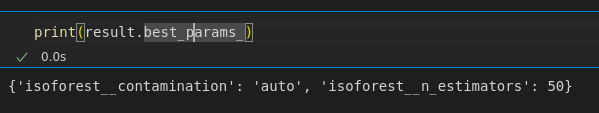

Chosing between the auto and the outlierfraction seemed limited, so I went for an range next for contamination.

In [26]:
hyperparams = {'isoforest__n_estimators': np.arange(1, 200, 50),
               'isoforest__contamination': np.arange(0.01, 0.1, 0.02),
               
               }

In [27]:
pipeline = Pipeline([('prep', prep), ('isoforest', isolation)])
grid_search = GridSearchCV(scoring=scorer_f, estimator=pipeline, param_grid=hyperparams, cv=5, n_jobs=-1)
param_result = grid_search.fit(df)

In [28]:
print(param_result.best_params_)
print(param_result.best_score_)

{'isoforest__contamination': 0.049999999999999996, 'isoforest__n_estimators': 51}
-0.4331073730964728


Gridsearch does give an different contamination than what we've calculated before. Also, the scoring seems to have worked

##### Plotting

In [38]:

def plot_sensor_anomolies(sensor, name):
    anomoly_rows = df[df[f'IsolationForest'] == -1]
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering',alpha = 0.5)
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')
    plot = plt.plot(anomoly_rows[sensor], linestyle='none', marker='X', color='blue', markersize=4, label='anomoly predicted', alpha = 0.1)
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

__Scores and plot for the ouliers_fraction__

In [39]:
isofor = IsolationForest(contamination=outliers_fraction, n_jobs = -1)
pipe = Pipeline([('prep', prep,), ('isofor', isofor)])
test = pipe.fit_predict(df)
# y_pred = IF.fit(X).predict(X)

In [43]:
df['IsolationForest'] = test
print('-'*100)
print(f'number of anomolies detected')
print(df['IsolationForest'].value_counts())
print('-'*100)


----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    205836
-1     14484
Name: IsolationForest, dtype: int64
----------------------------------------------------------------------------------------------------


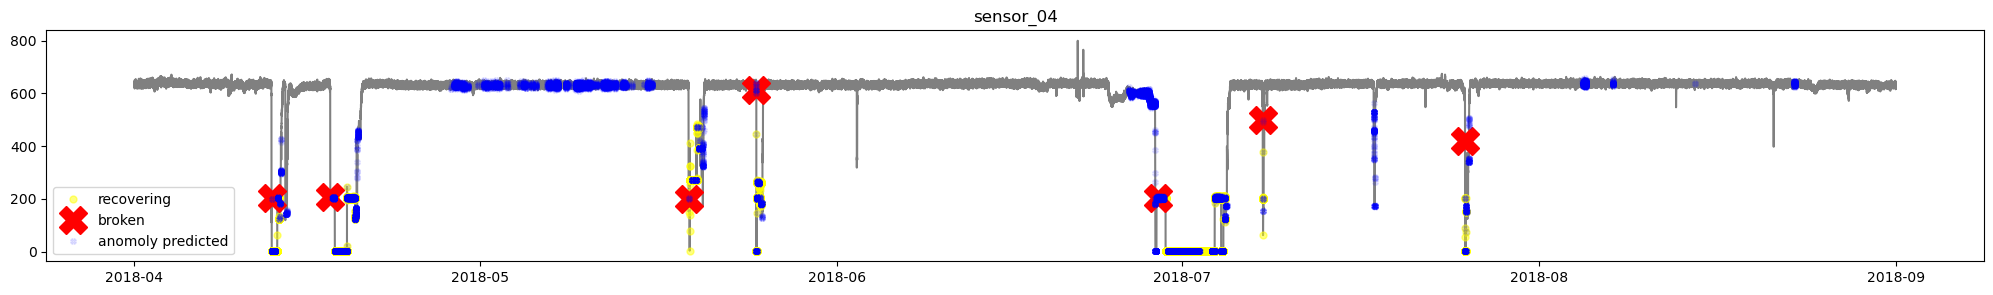

In [44]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')


__Contamination based on the Gridsearch__

In [46]:
isofor = IsolationForest(contamination=0.049999999999999996, n_estimators=51, n_jobs = -1)
pipe = Pipeline([('prep', prep,), ('isofor', isofor)])
test = pipe.fit_predict(df)
# y_pred = IF.fit(X).predict(X)

In [47]:
df['IsolationForest'] = test
print('-'*100)
print(f'number of anomolies detected')
print(df['IsolationForest'].value_counts())
print('-'*100)

----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    209304
-1     11016
Name: IsolationForest, dtype: int64
----------------------------------------------------------------------------------------------------


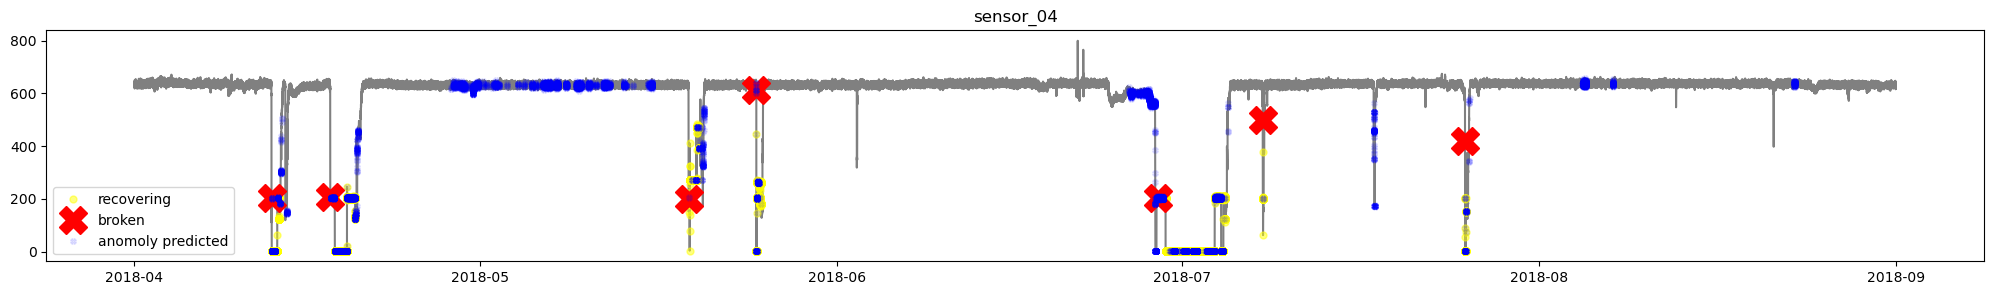

In [48]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')


The with the tuned parameters, less anomlies are detected. <br>
Visually it's really hard to see if it detect less anomolies and where. You can't really see if it is in place where you would expect anomolies or not. (Compared to the plot based on the outlier fraction)

Change the amount of estimaters to 100

In [49]:
isofor = IsolationForest(contamination=0.049999999999999996, n_estimators=100, n_jobs = -1)
pipe = Pipeline([('prep', prep,), ('isofor', isofor)])
test = pipe.fit_predict(df)
# y_pred = IF.fit(X).predict(X)

In [33]:
df['IsolationForest'] = test
print('-'*100)
print(f'number of anomolies detected')
print(df['IsolationForest'].value_counts())
print('-'*100)

----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    209304
-1     11016
Name: IsolationForest, dtype: int64
----------------------------------------------------------------------------------------------------


Score remains the same and the plot also looks the same.

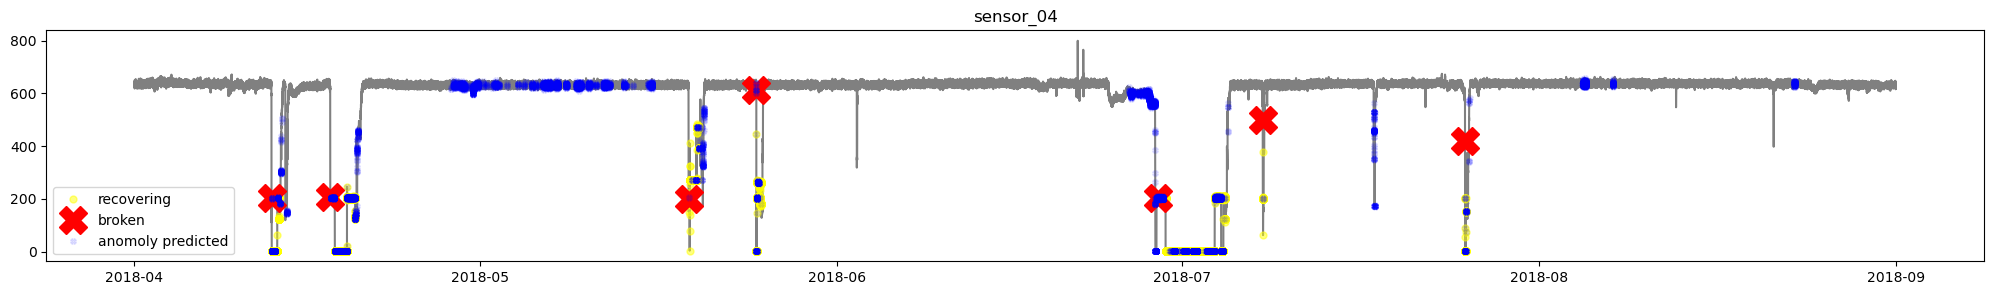

In [50]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')


Increasing to contamination to slightly higher than the calculated outlier fraction

In [51]:
isofor = IsolationForest(contamination=0.08, n_estimators=51, n_jobs = -1)
pipe = Pipeline([('prep', prep,), ('isofor', isofor)])
test = pipe.fit_predict(df)
# y_pred = IF.fit(X).predict(X)

In [52]:
df['IsolationForest'] = test
print('-'*100)
print(f'number of anomolies detected')
print(df['IsolationForest'].value_counts())
print('-'*100)

----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    202694
-1     17626
Name: IsolationForest, dtype: int64
----------------------------------------------------------------------------------------------------


The number of anomolies detected does as expected indeed increase. It seems to detect more anomolies where it shouldn't (the long line of blue seems more dense), so those predictions aren't great

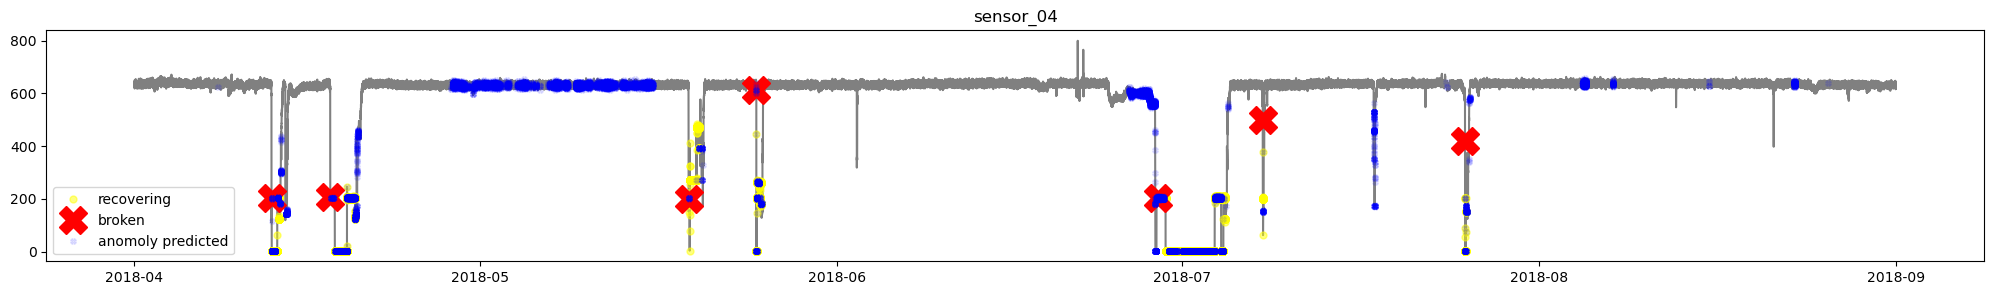

In [53]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

Changing contamination to auto

In [54]:
isofor = IsolationForest(contamination='auto', n_estimators=51, n_jobs = -1)
pipe = Pipeline([('prep', prep,), ('isofor', isofor)])
test = pipe.fit_predict(df)
# y_pred = IF.fit(X).predict(X)

In [55]:
df['IsolationForest'] = test
print('-'*100)
print(f'number of anomolies detected')
print(df['IsolationForest'].value_counts())
print('-'*100)

----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    185051
-1     35269
Name: IsolationForest, dtype: int64
----------------------------------------------------------------------------------------------------


The amount of anomolies detected is much higher

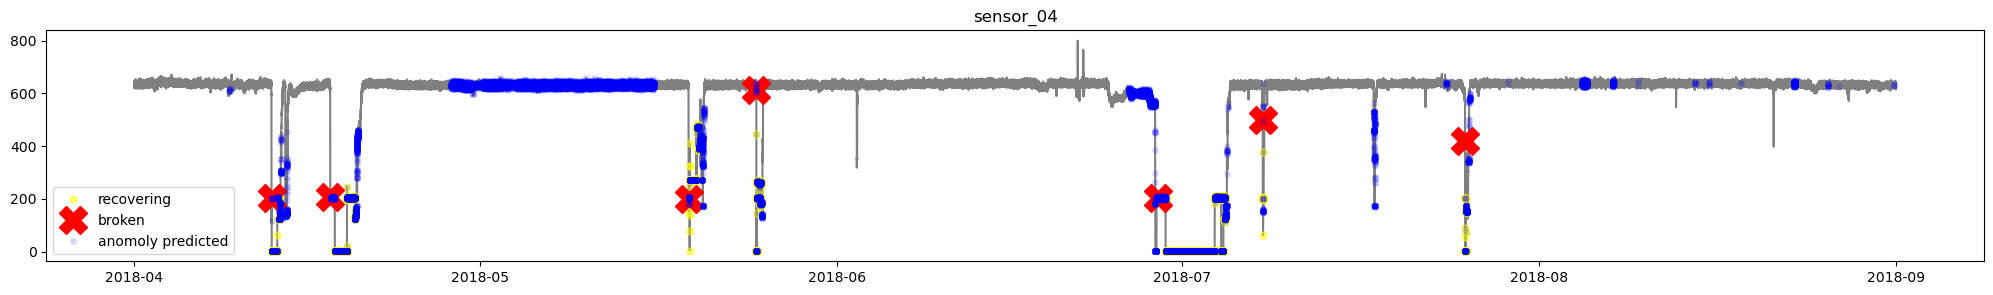

In [56]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

In [57]:
isofor = IsolationForest(contamination='auto', n_estimators=100, n_jobs = -1)
pipe = Pipeline([('prep', prep,), ('isofor', isofor)])
test = pipe.fit_predict(df)
# y_pred = IF.fit(X).predict(

In [58]:
df['IsolationForest'] = test
print('-'*100)
print(f'number of anomolies detected')
print(df['IsolationForest'].value_counts())
print('-'*100)

----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    179736
-1     40584
Name: IsolationForest, dtype: int64
----------------------------------------------------------------------------------------------------


With increased estimators the amount of anomolies detected is even higher

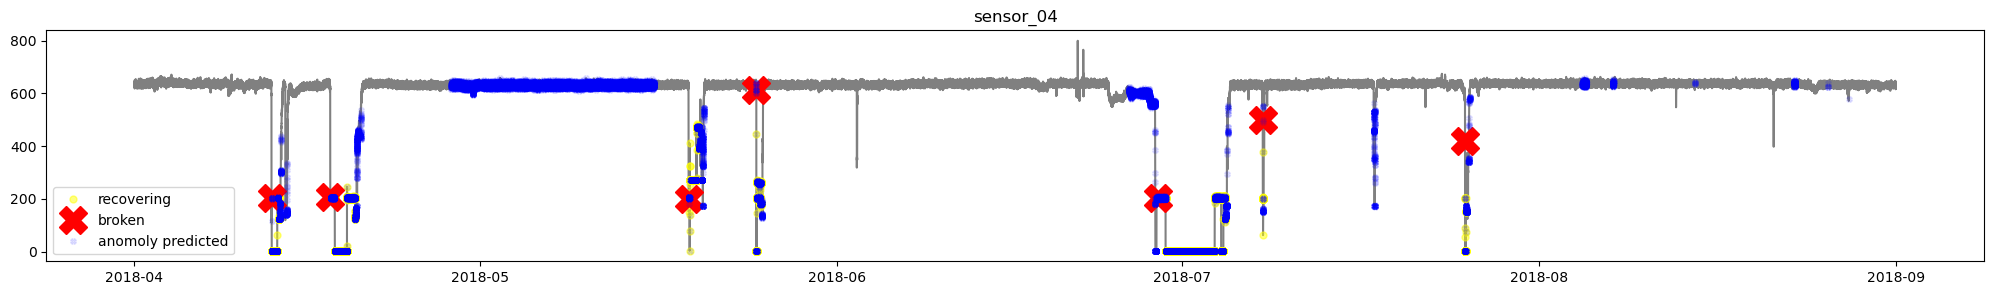

In [59]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

With auto contamination detection and more estimators, you see an increase in predictions where you would expect (around the broken and recovering machines). However, it predicts more on places where there are no problems with machines at all. So it's not great at predicting.
Overall, even when trying to find a better configuration for Isolation forest the outcomes are still not statisfactory.

Also, gridsearch does not seem to work well for IsolationForest and LocalOutlierfactor, because they're unsupervised models. They don't really work with scores: for localoutlierfactor it's only available for novelty detection and for IsolationForest gives the anomaly score of an input sample that is computed as the mean anomaly score of the trees in the forest. They don't have scoring metrics, you can  kinda get around it with creating one yourself, but the outcome is still not great. <br>
Manually trying configurations might have been faster, but it's a process in understanding how these models work.